# NDVI Index with DN values

In [0]:
!pip install rasterio
!pip install earthpy
import rasterio
import numpy
import earthpy.plot as ep

In [0]:
with rasterio.open("0001.tif") as src:
    image = src.read()
    img_meta = src.profile

In [0]:
image_meta = src.meta
image_meta

{'count': 4,
 'crs': CRS.from_epsg(32615),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 8670,
 'nodata': None,
 'transform': Affine(0.05978467192129588, 0.03966773751685392, 605315.5515502311,
       0.03966773751685392, -0.05978467192129588, 1941084.9512889031),
 'width': 13470}

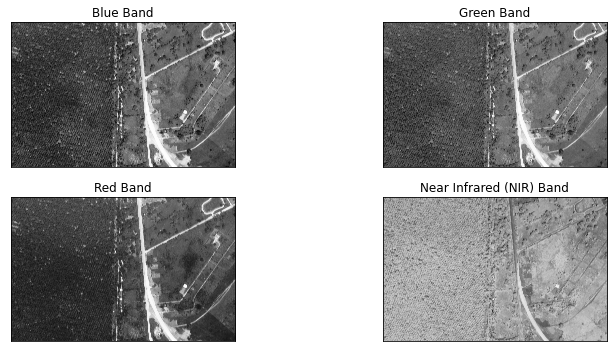

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0df4b8fd0>,
      dtype=object)

In [0]:
titles = ["Blue Band", "Green Band", "Red Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(image, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)

**Calculate NDVI with Digital Values**

In [0]:
#NDVI
img_ndvi = ((image[3] - (0.801*image[2]))/(image[3] + (0.801*image[2])))

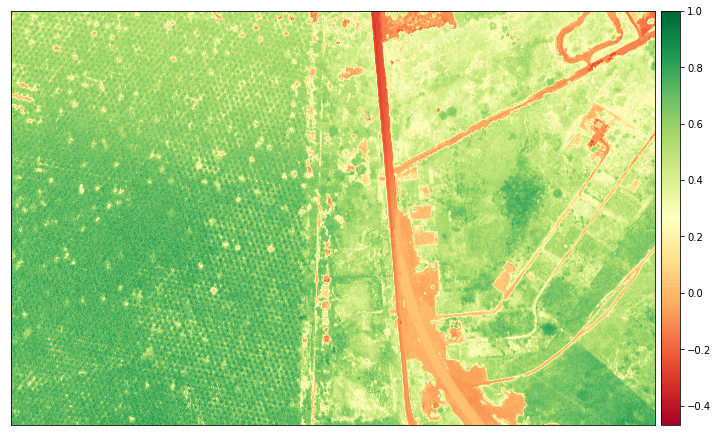

In [0]:
ep.plot_bands(img_ndvi, cmap='RdYlGn',
              scale=False#,
              #vmin=-1, vmax=1
             )

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0df21fc18>)

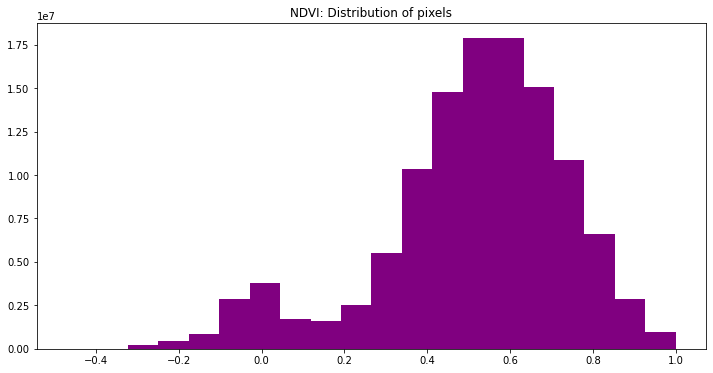

In [0]:
ep.hist(img_ndvi,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels"])

In [0]:
type(img_ndvi), img_ndvi.dtype

(numpy.ndarray, dtype('float64'))

In [0]:
img_meta

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 13470, 'height': 8670, 'count': 4, 'crs': CRS.from_epsg(32615), 'transform': Affine(0.05978467192129588, 0.03966773751685392, 605315.5515502311,
       0.03966773751685392, -0.05978467192129588, 1941084.9512889031), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'interleave': 'pixel'}

**Save Result**

In [0]:
img_transform = img_meta["transform"]
img_crs = img_meta["crs"]

img_transform, img_crs

(Affine(0.05978467192129588, 0.03966773751685392, 605315.5515502311,
       0.03966773751685392, -0.05978467192129588, 1941084.9512889031),
 CRS.from_epsg(32615))

In [0]:
img_meta['count'] = 1
img_meta['dtype'] = "float64"
img_meta

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 13470, 'height': 8670, 'count': 1, 'crs': CRS.from_epsg(32615), 'transform': Affine(0.05978467192129588, 0.03966773751685392, 605315.5515502311,
       0.03966773751685392, -0.05978467192129588, 1941084.9512889031), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'interleave': 'pixel'}

In [0]:
with rasterio.open('img_ndvi.tif', 'w', **img_meta) as dst:
    dst.write(img_ndvi, 1)